# 第6章: 機械学習
> 本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む

## 50. データの入手・整形
> `News Aggregator Data Set`をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．
1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [4]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip

--2020-12-18 14:19:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 29224203 (28M) [application/x-httpd-php]
`NewsAggregatorDataset.zip' に保存中

NewsAggregatorDatas 100%[===================>]  27.87M  6.50MB/s 時間 5.2s       

2020-12-18 14:19:29 (5.35 MB/s) - `NewsAggregatorDataset.zip' へ保存完了 [29224203/29224203]



In [5]:
!unzip NewsAggregatorDataset.zip

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


### README.txtより
>`SUMMARY`: Dataset of references (urls) to news web pages.  
`DESCRIPTION`: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.  
`TAGS`: web pages, news, aggregator, classification, clustering

### CONTENT
==============

>FILENAME #1: newsCorpora.csv (102.297.000 bytes)  
DESCRIPTION: News pages  
FORMAT: ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP  
`
where:
ID		Numeric ID
TITLE		News title 
URL		Url
PUBLISHER	Publisher name
CATEGORY	News category (b = business, t = science and technology, e = entertainment, m = health)
STORY		Alphanumeric ID of the cluster that includes news about the same story
HOSTNAME	Url hostname
TIMESTAMP 	Approximate time the news was published, as the number of milliseconds since the epoch 00:00:00 GMT, January 1, 1970
`  
FILENAME #2: 2pageSessions.csv (3.049.986 bytes)  
DESCRIPTION: 2-page sessions  
FORMAT: STORY \t HOSTNAME \t CATEGORY \t URL  
`
where:
STORY		Alphanumeric ID of the cluster that includes news about the same story
HOSTNAME	Url hostname
CATEGORY	News category (b = business, t = science and technology, e = entertainment, m = health)
URL		Two space-delimited urls representing a browsing session
`


In [10]:
import pandas as pd
import numpy as np
df_news_corpora = pd.read_csv('newsCorpora.csv', sep='\t', names=('ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'))
df_2_page_sessions = pd.read_csv('2pageSessions.csv', sep='\t', names=('STORY', 'HOSTNAME', 'CATEGORY', 'URL'))

# tab区切りのときはread_csvではなく, read_tableを使うと良い

In [11]:
df_news_corpora.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [42]:
print(df_news_corpora[df_news_corpora.ID == 210713].TITLE.iloc[0])

The Best Reactions To The Supposed Video of Solange Knowles & Jay Z  ...	http://www.hiphopdx.com/index/news/id.28728/title.-the-best-reactions-to-the-supposed-video-of-solange-knowles-jay-z-fighting-in-an-elevator-list-by-time/	HipHopDX	e	dku0uRoeehpC9JM1RoZ4n0fg8cyoM	www.hiphopdx.com	1399983366398
210714	Report: Jay-Z attacked by Beyonce's sister	http://www.wsbtv.com/news/entertainment/report-jay-z-attacked-beyonces-sister/nftYg/\?icmp=cmgcontent_internallink_relatedcontent_2014_partners4	WSB Atlanta	e	dku0uRoeehpC9JM1RoZ4n0fg8cyoM	www.wsbtv.com	1399983366584
210715	Not So Drunk In Love? 50 Cent Reacts To Beyonce NOT Defending Jay Z In  ...	http://www.entertainmentwise.com/news/148948/Not-So-Drunk-In-Love-50-Cent-Reacts-To-Beyonce-NOT-Defending-Jay-Z-In-Solange-Knowles-Elevator-Fight	Entertainmentwise	e	dku0uRoeehpC9JM1RoZ4n0fg8cyoM	www.entertainmentwise.com	1399983366926
210716	Before the Brawl! Find Out What Happened At The After-Party That Sparked  ...	http://radaronline.com/photos

In [47]:
# 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”,
# “Daily Mail”の事例（記事）のみを抽出する

"""
pep-8のお行儀重視すると,もうちょっと分割して書いた方が読みやすい
"""
df_target = df_news_corpora[(df_news_corpora.PUBLISHER == 'Reuters') | (df_news_corpora.PUBLISHER == 'Huffington Post') | 
                            (df_news_corpora.PUBLISHER == 'Businessweek') | (df_news_corpora.PUBLISHER == 'Contactmusic.com') | 
                            (df_news_corpora.PUBLISHER == 'Daily Mail')]

In [46]:
df_target[df_news_corpora.PUBLISHER == 'Reuters']

<ipython-input-46-8be51edb3aa2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_target[df_news_corpora.PUBLISHER == 'Reuters']


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070
30,31,UPDATE 1-ECB to reveal bad loan hurdles for eu...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505314
35,36,Central banks must contain threats from low pr...,http://www.reuters.com/article/2014/03/10/us-e...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.reuters.com,1394470506238
...,...,...,...,...,...,...,...,...
421935,422454,UPDATE 2-US names Connecticut official to lead...,http://www.reuters.com/article/2014/08/26/usa-...,Reuters,m,drbHX2-GkgsIZjMovsFKIC2IOEHBM,www.reuters.com,1409225963448
422139,422658,UPDATE 1-US says non-allergic peanut moves clo...,http://www.reuters.com/article/2014/08/26/usda...,Reuters,m,dfKgd72ObUoZQ2Mr8OpGVrzdfspUM,www.reuters.com,1409227750846
422141,422660,US says non-allergic peanut closer to commerci...,http://www.reuters.com/article/2014/08/26/usda...,Reuters,m,dfKgd72ObUoZQ2Mr8OpGVrzdfspUM,www.reuters.com,1409227751327
422301,422820,"Ebola toll tops 1550, continues to accelerate ...",http://in.reuters.com/article/2014/08/28/healt...,Reuters,m,dhhnSHVoyA7ENBM3boDX_D_-3PV6M,in.reuters.com,1409228423827


In [13]:
df_target = df_target[['TITLE', 'CATEGORY', 'PUBLISHER']]
df_target.head(3)

,TITLE,CATEGORY,PUBLISHER
12,Europe reaches crunch point on banking union,b,Reuters
13,ECB FOCUS-Stronger euro drowns out ECB's messa...,b,Reuters
19,"Euro Anxieties Wane as Bunds Top Treasuries, S...",b,Businessweek


In [14]:
# 抽出された事例をランダムに並び替える & インデックスのふり直し
df_target = df_target.sample(frac=1, random_state=0).reset_index(drop=True)
df_target.head(3)

,TITLE,CATEGORY,PUBLISHER
0,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,b,Reuters
1,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",e,Businessweek
2,"UPDATE 1-Fairfax Financial, CEO probed over po...",b,Reuters


In [15]:
"""
scikit-learnのtrain_test_splitを2回使ってやるとかだともっとコード少なくて済む！
random_stateでシード値固定して再現性を担保！
"""
len_eighty = int(len(df_target)*0.8)
len_ninety = int(len(df_target)*0.9)
df_train = df_target[:len_eighty]
df_valid = df_target[len_eighty:len_ninety]
df_test = df_target[len_ninety:]

In [16]:
# 分割数の確認
print(f'分割前のファイル全体 = {len(df_target)}')
print(f'df_train = {len(df_train)} + df_valid = {len(df_valid)} + df_test = {len(df_test)}, sum = {len(df_test)+len(df_valid)+len(df_train)}')

分割前のファイル全体 = 13340
df_train = 10672 + df_valid = 1334 + df_test = 1334, sum = 13340


In [9]:
# ファイルの書き出し
df_train.to_csv('../Chap8/train.txt', sep='\t')
df_valid.to_csv('../Chap8/valid.txt', sep='\t')
df_test.to_csv('../Chap8/test.txt', sep='\t')

df_train: Reuters             3098
Huffington Post     1968
Businessweek        1928
Contactmusic.com    1865
Daily Mail          1813
Name: PUBLISHER, dtype: int64


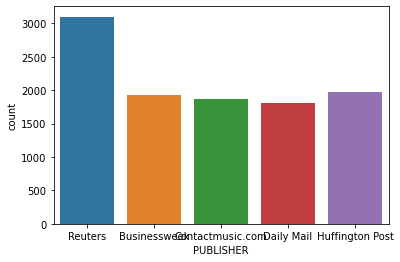

In [17]:
# 各カテゴリの事例数を確認
import seaborn as sns
print(f'df_train: {df_train.PUBLISHER.value_counts()}')
sns.countplot(df_train.PUBLISHER);

In [ ]:
print(f'df_train: {df_train.CATEGORY.value_counts()}')
sns.countplot(df_train.CATEGORY);

df_valid: b    570
e    530
t    137
m     97
Name: CATEGORY, dtype: int64


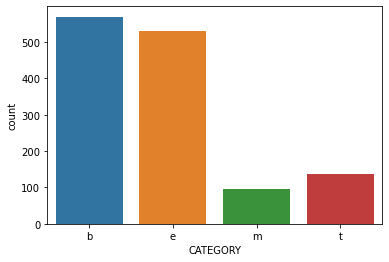

In [10]:
print(f'df_valid: {df_valid.CATEGORY.value_counts()}')
sns.countplot(df_valid.CATEGORY);

df_test: b    564
e    517
t    157
m     96
Name: CATEGORY, dtype: int64


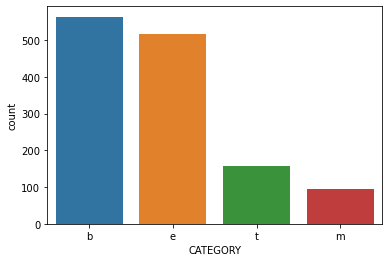

In [11]:
print(f'df_test: {df_test.CATEGORY.value_counts()}')
sns.countplot(df_test.CATEGORY);

## 51. 特徴量抽出
>学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

単語の出現頻度を求める -> scikit learnのCountVetorizerで簡単に求められる  
出現頻度を求める方法は特徴量抽出という手法を用いる.  
特徴量抽出とは、学習データにどのような特徴があるかをベクトル化したもので、今回のケースでは単語の出現頻度がベクトル（数値）にあたる.

In [12]:
df_train.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,311098,RPT-Fitch Updates EMEA Consumer ABS Rating Cri...,http://in.reuters.com/article/2014/06/24/fitch...,Reuters,b,d3tIMfB2mg-9MZM4G_jGTEiRVl3jM,in.reuters.com,1403633888597
1,49198,"Gurlitt Wants to Return Nazi-Looted Art, Suedd...",http://www.businessweek.com/news/2014-03-26/gu...,Businessweek,e,dWeC4g3bvX-bI6MKAcxt43Jp7MzSM,www.businessweek.com,1395886231417
2,410578,"UPDATE 1-Fairfax Financial, CEO probed over po...",http://in.reuters.com/article/2014/08/01/fairf...,Reuters,b,d6s61cXf9rASExMO8inpkRujc9VTM,in.reuters.com,1406929609070


In [13]:
# CountVectorizerのデモ(BoW化)

from sklearn.feature_extraction.text import CountVectorizer

# ベクトル化する文字列(3文)
sample = np.array(['Apple computer of the apple mark', 'linux computer', 'windows computer'])

# CountVectorizer
vec_count = CountVectorizer()

# ベクトル化
vec_count.fit(sample)
X = vec_count.transform(sample)

print('Vocabulary size: {}'.format(len(vec_count.vocabulary_)))
print('Vocabulary content: {}'.format(vec_count.vocabulary_))

pd.DataFrame(X.toarray(), columns=vec_count.get_feature_names())

Vocabulary size: 7
Vocabulary content: {'apple': 0, 'computer': 1, 'of': 4, 'the': 5, 'mark': 3, 'linux': 2, 'windows': 6}


,apple,computer,linux,mark,of,the,windows
0,2,1,0,1,1,1,0
1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,1


CountVectorizerの弱点を補う手法としてTF-IDFのVectorizerがある.  
以下にTfidfVectorizerのデモを掲示する.

In [14]:
# TfidfVectorizerのデモ(TF-IDF化)

from sklearn.feature_extraction.text import TfidfVectorizer

# ベクトル化する文字列
sample = np.array(['Apple computer of the apple mark', 'linux computer', 'windows computer'])

# TfidfVectorizer
vec_tfidf = TfidfVectorizer()

# ベクトル化
X = vec_tfidf.fit_transform(sample)

print('Vocabulary size: {}'.format(len(vec_tfidf.vocabulary_)))
print('Vocabulary content: {}'.format(vec_tfidf.vocabulary_))

pd.DataFrame(X.toarray(), columns = vec_tfidf.get_feature_names())

Vocabulary size: 7
Vocabulary content: {'apple': 0, 'computer': 1, 'of': 4, 'the': 5, 'mark': 3, 'linux': 2, 'windows': 6}


,apple,computer,linux,mark,of,the,windows
0,0.73777,0.217869,0.000000,0.368885,0.368885,0.368885,0.000000
1,0.00000,0.508542,0.861037,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.508542,0.000000,0.000000,0.000000,0.000000,0.861037


### 今回はTfidfVectorizerを用いて単語の特徴量抽出を行う.  

In [15]:
vec_tfidf = TfidfVectorizer()

# trainデータでfit
X_train = vec_tfidf.fit_transform(df_train.TITLE).toarray()
X_valid = vec_tfidf.transform(df_valid.TITLE).toarray()
X_test = vec_tfidf.transform(df_test.TITLE).toarray()

print('Vocabulary size: {}'.format(len(vec_tfidf.vocabulary_)))
# print('Vocabulary content: {}'.format(vec_tfidf.vocabulary_))

pd.DataFrame(X_train, columns = vec_tfidf.get_feature_names())

Vocabulary size: 12881


,00,05,07,08,0ff,0ut,10,100,1000,10000,...,zombies,zone,zoosk,zpfa3mqti7qdrpfhqwjm,zuckerberg,zynga,zâ,œf,œlousyâ,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328642,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 標準化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns = vec_tfidf.get_feature_names())

,00,05,07,08,0ff,0ut,10,100,1000,10000,...,zombies,zone,zoosk,zpfa3mqti7qdrpfhqwjm,zuckerberg,zynga,zâ,œf,œlousyâ,œwaist
0,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
1,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
2,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
3,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
4,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
10668,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,18.016948,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
10669,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968
10670,-0.013691,-0.00968,-0.00968,-0.00968,-0.00968,-0.00968,-0.083938,-0.056840,-0.028936,-0.00968,...,-0.00968,-0.0669,-0.00968,-0.00968,-0.019327,-0.016732,-0.00968,-0.00968,-0.00968,-0.00968


In [17]:
# ファイルの書き出し
np.savetxt('train.feature.txt', X_train_scaled)
np.savetxt('valid.feature.txt', X_valid_scaled)
np.savetxt('test.feature.txt', X_test_scaled)

## 52. 学習
>51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter = 10000, tol=1e-3)
model.fit(X_train_scaled, df_train.CATEGORY)

LogisticRegression(max_iter=10000, solver='liblinear', tol=0.001)

## 53.予測
>52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ.

In [18]:
print(f'訓練用データ: {model.score(X_train_scaled, df_train.CATEGORY)}')
print(f'検証用データ: {model.score(X_valid_scaled, df_valid.CATEGORY)}')

訓練用データ: 0.9993440779610195
検証用データ: 0.9190404797601199


In [19]:
def category_predictor(given_title: str) -> (str, float):
    # title文字列を学習済みのtfidfVectorizer(), StandardScaler()を用いてベクトル化
    title_vec = vec_tfidf.transform([given_title]).toarray()
    title_vec_scaled = scaler.transform(title_vec)
    
    # 入力タイトルの予測カテゴリ
    pred_category = model.predict(title_vec_scaled)
    
    # model.classes_には分類先のカテゴリが全て格納されているので, 予測カテゴリのindexを取得 -> predict_probaが全てのカテゴリへの分類確率を格納している
    index = np.where(model.classes_== pred_category)
    
    # indexを使って, 予測カテゴリの予測確率を取得
    # .predict_probaが多次元配列なのでravel()メソッドで配列を1次元化
    probability = model.predict_proba(title_vec_scaled).ravel()[index[0]] 
    return pred_category[0], probability[0]

In [20]:
print(category_predictor(df_train.TITLE[0]))
print(f'正解は{df_train.CATEGORY[0]}')

('b', 0.9985592535384239)
正解はb


## 54.正解率の計測
>52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ

$$
\frac{TP + TN} {TP + TN + FT + FN}
$$

In [21]:
from sklearn.metrics import accuracy_score
# accracy_score(y_true, y_pred)
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

print(f'学習データの正解率: {accuracy_score(df_train.CATEGORY, train_pred)}')
print(f'評価データの正解率: {accuracy_score(df_test.CATEGORY, test_pred)}')

学習データの正解率: 0.9993440779610195
評価データの正解率: 0.9062968515742129


オーバーフィッティングしている...

In [22]:
# 正則化してみる
re_model = LogisticRegression(solver='liblinear', max_iter = 10000, tol=1e-3, penalty='l2', C=100)
re_model.fit(X_train_scaled, df_train.CATEGORY)

train_pred = re_model.predict(X_train_scaled)
test_pred = re_model.predict(X_test_scaled)

print(f'学習データの正解率: {accuracy_score(df_train.CATEGORY, train_pred)}')
print(f'評価データの正解率: {accuracy_score(df_test.CATEGORY, test_pred)}')

学習データの正解率: 0.9993440779610195
評価データの正解率: 0.9017991004497751


むしろ評価データの正解率下がった. -> 問58

## 55. 混同行列の作成
>52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ

In [23]:
from sklearn.metrics import confusion_matrix
train_cont_mat = pd.DataFrame(confusion_matrix(df_train.CATEGORY, train_pred),
                                               index = ['正解b', '正解e', '正解m', '正解t'],
                                               columns = ['予測b', '予測e', '予測m', '予測t'])

test_cont_mat = pd.DataFrame(confusion_matrix(df_test.CATEGORY, test_pred),
                                               index = ['正解b', '正解e', '正解m', '正解t'],
                                               columns = ['予測b', '予測e', '予測m', '予測t'])

print('学習データの混同行列')
display(train_cont_mat)
print('\n評価データの混同行列')
display(test_cont_mat)

学習データの混同行列


,予測b,予測e,予測m,予測t
正解b,4492,0,0,1
正解e,2,4229,0,1
正解m,0,0,717,0
正解t,3,0,0,1227



評価データの混同行列


,予測b,予測e,予測m,予測t
正解b,520,10,4,30
正解e,10,500,2,5
正解m,14,11,67,4
正解t,27,10,4,116


## 56. 適合率，再現率，F1スコアの計測
>52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ

#### 適合率
>$$
適合率 = \frac{TP}{TP+FP}
$$

#### 再現率
>$$
再現率 = \frac{TP}{TP+FN}
$$

#### F1スコア
>$$
F1 = \frac{2 × Precision × Recall}{Precision + Recall}
$$

#### マイクロ平均
>各クラスごとの計算をせずに、混合行列全体からTP等の値集計をして算出

#### マクロ平均
>単純な相加平均

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [25]:
# average=Noneとすると各カテゴリに対する値が返ってくる.microとかmacroにすればマイクロ平均, マクロ平均が返ってくる

# 適合率の計算.各カテゴリの値を格納した配列にマイクロ平均,マクロ平均の要素を付け足す
precision = precision_score(df_test.CATEGORY, test_pred, average=None, labels = ['b', 'e', 'm', 't'])
precision = np.append(precision, precision_score(df_test.CATEGORY, test_pred, average='micro'))
precision = np.append(precision, precision_score(df_test.CATEGORY, test_pred, average='macro'))

# 再現率
recall = recall_score(df_test.CATEGORY, test_pred, average=None, labels = ['b', 'e', 'm', 't'])
recall = np.append(recall, recall_score(df_test.CATEGORY, test_pred, average='micro'))
recall = np.append(recall, recall_score(df_test.CATEGORY, test_pred, average='macro'))

# F1
f1 = f1_score(df_test.CATEGORY, test_pred, average=None, labels = ['b', 'e', 'm', 't'])
f1 = np.append(f1, f1_score(df_test.CATEGORY, test_pred, average='micro'))
f1 = np.append(f1, f1_score(df_test.CATEGORY, test_pred, average='macro'))

#  DataFrame表示のための成型.
all_score = np.append(precision, recall, axis=0)
all_score = np.append(all_score, f1, axis=0).reshape(3, 6)

df_all = pd.DataFrame(all_score, index=['適合率', '再現率', 'F1'], columns=['b', 'e', 'm', 't', 'micro', 'macro'])
display(df_all)

,b,e,m,t,micro,macro
適合率,0.910683,0.941620,0.870130,0.748387,0.901799,0.867705
再現率,0.921986,0.967118,0.697917,0.738854,0.901799,0.831468
F1,0.916300,0.954198,0.774566,0.743590,0.901799,0.847164


## 57. 特徴量の重みの確認
>52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ

In [26]:
model.coef_.shape
# 多クラス分類問題なので,クラスごとの重みがリストになって格納されている

(4, 12881)

In [27]:
from pprint import pprint
# 特徴量の名前をnp.ndarray形式で用意
features = np.array(vec_tfidf.get_feature_names())

for category, coef in zip(model.classes_, model.coef_):
    # argsortすると, ソートされた値ではなくインデックス番号を取得してくれる(ここでは昇順ソート)
    index = np.argsort(coef)
    print(category)
    
    print('重みの高い特徴量トップ10')
    pprint(features[index][-10:][::-1])   # 最後の10個を持ってきて, それを逆順にする = 重みの高い特徴量トップ10
    print('重みの低い特徴量トップ10')
    pprint(features[index][:10])   # 最初の10個を持ってくる　= 重みの低い特徴量トップ10
    print('======================')

b
重みの高い特徴量トップ10
array(['update', 'fed', 'ecb', 'stocks', 'bank', 'inflation', 'dollar',
       'obamacare', 'china', 'ukraine'], dtype='<U53')
重みの低い特徴量トップ10
array(['april', 'activision', 'apple', 'google', 'fcc', 'facebook',
       'climate', 'ebola', 'the', 'kardashian'], dtype='<U53')
e
重みの高い特徴量トップ10
array(['miley', 'kardashian', 'cyrus', 'kim', 'mother', 'chris',
       'wedding', 'bieber', 'april', 'thrones'], dtype='<U53')
重みの低い特徴量トップ10
array(['apple', 'us', 'google', 'update', 'microsoft', 'facebook',
       'china', 'ceo', 'than', 'neutrality'], dtype='<U53')
m
重みの高い特徴量トップ10
array(['ebola', 'mers', 'cigarettes', 'fda', 'cancer', 'study',
       'outbreak', 'cases', 'alzheimer', 'hiv'], dtype='<U53')
重みの低い特徴量トップ10
array(['20', 'partying', 'roche', 'wearing', 'dimon', 'demanding',
       'errors', 'triples', 'funding', 'theaten'], dtype='<U53')
t
重みの高い特徴量トップ10
array(['google', 'facebook', 'apple', 'climate', 'microsoft',
       'neutrality', 'fcc', 'nasa', 'tesla', 'iphone'], dtyp

## 58. 正則化パラメータの変更
>ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ

In [28]:
Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
train_score = []
valid_score = []
test_score = []

for c in Cs:
    "L2正則化"
    model = LogisticRegression(C=c,max_iter=2000, solver='lbfgs', tol=1e-3, penalty='l2', multi_class='auto')
    model.fit(X_train_scaled, df_train.CATEGORY)
    train_score.append(accuracy_score(df_train.CATEGORY, model.predict(X_train_scaled)))
    valid_score.append(accuracy_score(df_valid.CATEGORY, model.predict(X_valid_scaled)))
    test_score.append(accuracy_score(df_test.CATEGORY, model.predict(X_test_scaled)))

/Users/nagasawa_h/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


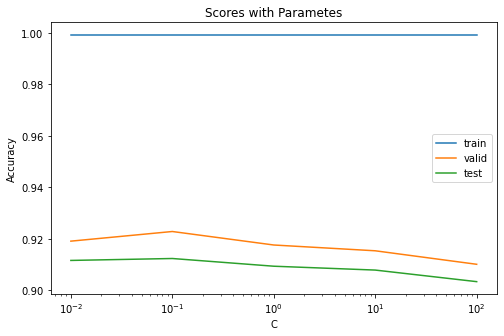

In [29]:
# グラフの描画
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))
plt.xscale('log')
plt.plot(Cs, train_score, label='train')
plt.plot(Cs, valid_score, label='valid')
plt.plot(Cs, test_score, label='test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()
plt.title('Scores with Parametes')
plt.show()

trainのスコアが変動していないが, これは扱うデータが標準化されている & データが不均衡(今回はaccuracy高めに出やすい) & ベクトル空間かなり広めなので決定境界が簡単に引けちゃう.

In [37]:
print(train_score, valid_score, test_score, sep='\n')

[0.9993440779610195, 0.9993440779610195, 0.9993440779610195, 0.9993440779610195, 0.9993440779610195]
[0.9190404797601199, 0.9227886056971514, 0.9175412293853074, 0.9152923538230885, 0.9100449775112444]
[0.9115442278860569, 0.9122938530734632, 0.9092953523238381, 0.9077961019490255, 0.9032983508245878]


## 59. ハイパーパラメータの探索
>学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ

In [33]:
# GridSearchCVを用いたパラメータ探索
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01, 0.1, 1.0, 10.0, 100.0],
                 'solver':['lbfgs', 'liblinear']}

clf = GridSearchCV(LogisticRegression(max_iter=10000, tol=1e-3, multi_class='auto'), params, cv=3, verbose=1)
clf.fit(X_train_scaled, df_train.CATEGORY)

"""
n_jobsなどの引数でマルチコア計算サポート　ー> ドキュメントは大事！！！ まずはドキュメントくらいの気持ちで.
"""

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 25.9min finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, tol=0.001),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=1)

In [34]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.1, 'solver': 'lbfgs'}
0.8930840385300892


In [35]:
print(accuracy_score(df_valid.CATEGORY, clf.predict(X_valid_scaled)))

0.9227886056971514


In [36]:
# 確率的勾配降下法
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=2000, tol=1e-3)
model.fit(X_train_scaled, df_train.CATEGORY)

print(f'train: {accuracy_score(df_train.CATEGORY, model.predict(X_train_scaled))}')
print(f'valid: {accuracy_score(df_valid.CATEGORY, model.predict(X_valid_scaled))}')
print(f'test: {accuracy_score(df_test.CATEGORY, model.predict(X_test_scaled))}')

train: 0.9949400299850075
valid: 0.8245877061469266
test: 0.8343328335832084


SVMが分類器としてよく使われている.RandomForestとかも有名.その辺も試してみるといいかも...